# Weather condition and Police behaviour

Weather data was collected by the National Centers for Environmental Information.

**Hypothesis**

Weather conditions impact police behaviour during traffic stops.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = "../datasets/"

In [2]:
weather_data = data_path + "weather.csv"
weather = pd.read_csv(weather_data)
weather.head(3)

STATION        DATE  TAVG  TMIN  TMAX  AWND  WSF2  WT01  WT02  WT03  \
0  USW00014765  2005-01-01  44.0    35    53  8.95  25.1   1.0   NaN   NaN   
1  USW00014765  2005-01-02  36.0    28    44  9.40  14.1   NaN   NaN   NaN   
2  USW00014765  2005-01-03  49.0    44    53  6.93  17.0   1.0   NaN   NaN   

   ...  WT11  WT13  WT14  WT15  WT16  WT17  WT18  WT19  WT21  WT22  
0  ...   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1  ...   NaN   NaN   NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN  
2  ...   NaN   1.0   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN  

[3 rows x 27 columns]

### Looking at the data for stability

#### Examining the wind speed

* AWND: Average wind speed in miles per hour
* WSF2: Fastest 2-minute wind speed

In [3]:
weather[['AWND', 'WSF2']].head()

AWND  WSF2
0  8.95  25.1
1  9.40  14.1
2  6.93  17.0
3  6.93  16.1
4  7.83  17.0

In [4]:
weather[['AWND', 'WSF2']].describe().T

count       mean       std   min    25%    50%    75%    max
AWND  4017.0   8.593707  3.364601  0.22   6.26   8.05  10.29  26.84
WSF2  4017.0  19.274782  5.623866  4.90  15.00  17.90  21.90  48.10

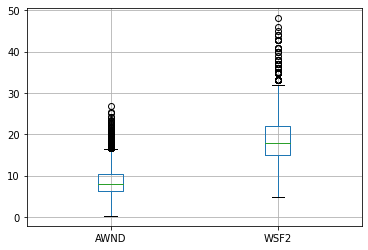

In [5]:
weather[['AWND', 'WSF2']].plot(kind='box')
plt.grid()
plt.show()

Again our goal here is simply to validate that the data looks rasonable.

It would also be useful to validate that the fastest wind speed values are greater than the average values for every single row.

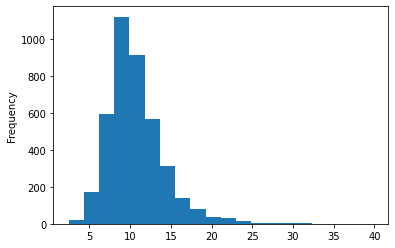

In [6]:
weather['WDIFF'] = weather.WSF2 - weather.AWND

# distribution of new column
weather['WDIFF'].plot(kind='hist', bins=20)
plt.show()

it seems a normal distribution, another sign that data is trustworthy.

#### Looking at temperature

In [7]:
temp = ['TMIN', 'TAVG', 'TMAX']
weather[temp].head()

TMIN  TAVG  TMAX
0    35  44.0    53
1    28  36.0    44
2    44  49.0    53
3    39  42.0    45
4    28  36.0    43

In [8]:
weather[temp].describe().T

count       mean        std   min   25%   50%   75%    max
TMIN  4017.0  43.484441  17.020298  -5.0  30.0  44.0  58.0   77.0
TAVG  1217.0  52.493016  17.830714   6.0  39.0  54.0  68.0   86.0
TMAX  4017.0  61.268608  18.199517  15.0  47.0  62.0  77.0  102.0

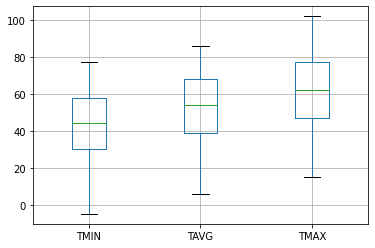

In [9]:
weather[temp].plot(kind='box')
plt.grid()
plt.show()

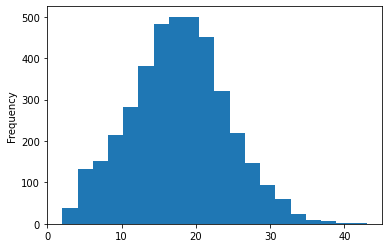

In [10]:
weather['TDIFF'] = weather.TMAX - weather.TMIN
weather.TDIFF.plot(kind='hist', bins=20)
plt.show()

This also is a normal distribution. temperature data seems to be reasonable

### Categorizing the Weather

In [11]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 29 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  4017 non-null   object 
 1   DATE     4017 non-null   object 
 2   TAVG     1217 non-null   float64
 3   TMIN     4017 non-null   int64  
 4   TMAX     4017 non-null   int64  
 5   AWND     4017 non-null   float64
 6   WSF2     4017 non-null   float64
 7   WT01     1767 non-null   float64
 8   WT02     221 non-null    float64
 9   WT03     224 non-null    float64
 10  WT04     117 non-null    float64
 11  WT05     360 non-null    float64
 12  WT06     25 non-null     float64
 13  WT07     79 non-null     float64
 14  WT08     404 non-null    float64
 15  WT09     69 non-null     float64
 16  WT10     2 non-null      float64
 17  WT11     1 non-null      float64
 18  WT13     1175 non-null   float64
 19  WT14     575 non-null    float64
 20  WT15     6 non-null      float64
 21  WT16     1326 

In [12]:
temp = weather.loc[:, 'TAVG':'TMAX']
temp.shape

(4017, 3)

In [13]:
ri = pd.read_pickle(data_path + "police.pkl")
ri.shape

(86536, 13)

In [14]:
ri.stop_duration.unique()

[0-15 Min, 16-30 Min, 30+ Min]
Categories (3, object): [0-15 Min, 16-30 Min, 30+ Min]

In [15]:
mapping = {'0-15 Min': 'short', '16-30 Min':'medium', '30+ Min':'long'}
ri['stop_length'] = ri.stop_duration.map(mapping)
ri.stop_length.dtype

CategoricalDtype(categories=['short', 'medium', 'long'], ordered=False)

In [16]:
cats_ordered = ['short', 'medium', 'long']
ri['stop_length'] = ri.stop_length.cat.reorder_categories(cats_ordered, ordered=True)
ri.stop_length.dtype

CategoricalDtype(categories=['short', 'medium', 'long'], ordered=True)

In [17]:
ri.stop_length.head(3)

stop_date_time
2005-01-04 12:55:00    short
2005-01-23 23:15:00    short
2005-02-17 04:15:00    short
Name: stop_length, dtype: category
Categories (3, object): [short < medium < long]

In [18]:
ri.groupby('stop_length').is_arrested.mean()

stop_length
short     0.013654
medium    0.093595
long      0.261572
Name: is_arrested, dtype: float64

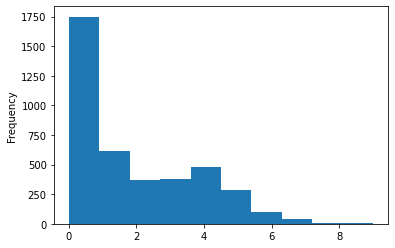

In [19]:
wt = weather.loc[:,'WT01':'WT22']
# sum of each row
wt['bad_conditions'] = wt.sum(axis=1)
# replace missing val with 0
wt['bad_conditions'] = wt.bad_conditions.fillna(0).astype('int')

# histogram
wt['bad_conditions'].plot(kind='hist')
plt.show()

seems a small portion of days had more than four bad weather conditions.

In [20]:
wt['bad_conditions'].describe()

count    4017.000000
mean        1.683346
std         1.933224
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         9.000000
Name: bad_conditions, dtype: float64

In [21]:
wt['bad_conditions'].unique()

array([2, 3, 4, 9, 6, 8, 5, 0, 1, 7])

In [22]:
# count the unique values and sort the index
wt.bad_conditions.value_counts().sort_index()

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64

In [23]:
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}
wt['rating'] = wt.bad_conditions.map(mapping)
wt['rating'].value_counts()

bad      1836
good     1749
worse     432
Name: rating, dtype: int64

In [24]:
cats = ['good', 'bad', 'worse']
cats_dtype = pd.api.types.CategoricalDtype(cats, ordered=True)
wt['rating'] = wt.rating.astype(cats_dtype)
wt['rating'].head()

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]

In [25]:
pd.__version__

'1.0.3'

In [26]:
# setting the index back to original of ri dataset
ri.reset_index(inplace=True)
ri.head(2)

stop_date_time   stop_date driver_gender driver_race  \
0 2005-01-04 12:55:00  2005-01-04             M       White   
1 2005-01-23 23:15:00  2005-01-23             M       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   

  stop_outcome  is_arrested stop_duration  drugs_related_stop district  frisk  \
0     Citation        False      0-15 Min               False  Zone X4  False   
1     Citation        False      0-15 Min               False  Zone K3  False   

  stop_length  
0       short  
1       short

In [27]:
wt['date'] = weather['DATE']
wt_ratings = wt.loc[:, ['date', 'rating']]
wt_ratings.head()

date rating
0  2005-01-01    bad
1  2005-01-02    bad
2  2005-01-03    bad
3  2005-01-04    bad
4  2005-01-05    bad

In [28]:
ri_weather = pd.merge(left=ri, right=wt_ratings, left_on='stop_date', right_on='date', how='left')
ri_weather.head()

stop_date_time   stop_date driver_gender driver_race  \
0 2005-01-04 12:55:00  2005-01-04             M       White   
1 2005-01-23 23:15:00  2005-01-23             M       White   
2 2005-02-17 04:15:00  2005-02-17             M       White   
3 2005-02-20 17:15:00  2005-02-20             M       White   
4 2005-02-24 01:20:00  2005-02-24             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome  is_arrested stop_duration  drugs_related_stop district  \
0       Citation        False      0-15 Min               False  Zone X4   
1       Citation        False      0-15 Min               False  Zone K3   
2       Citation        False      0-15 Min               False  Zone X4   
3  Arrest Driver         True     16-30 Min               False  Zone X1   
4       Citation        False      0-15 Min               False  Zone X3   

   frisk stop_length        date rating  
0  False       short  2005-01-04    bad  
1  False       short  2005-01-23  worse  
2  False       short  2005-02-17   good  
3  False      medium  2005-02-20    bad  
4  False       short  2005-02-24    bad

In [29]:
print(f"ri shape: {ri.shape}")
print(f"ri_weather shape: {ri_weather.shape}")

ri shape: (86536, 15)
ri_weather shape: (86536, 17)


In [30]:
# setting stop_date_time as index
ri_weather.set_index('stop_date_time', inplace=True)
ri_weather.head(2)

stop_date driver_gender driver_race  \
stop_date_time                                              
2005-01-04 12:55:00  2005-01-04             M       White   
2005-01-23 23:15:00  2005-01-23             M       White   

                                      violation_raw  violation  \
stop_date_time                                                   
2005-01-04 12:55:00  Equipment/Inspection Violation  Equipment   
2005-01-23 23:15:00                        Speeding   Speeding   

                     search_conducted search_type stop_outcome  is_arrested  \
stop_date_time                                                                
2005-01-04 12:55:00             False         NaN     Citation        False   
2005-01-23 23:15:00             False         NaN     Citation        False   

                    stop_duration  drugs_related_stop district  frisk  \
stop_date_time                                                          
2005-01-04 12:55:00      0-15 Min               False  Zone X4  False   
2005-01-23 23:15:00      0-15 Min               False  Zone K3  False   

                    stop_length        date rating  
stop_date_time                                      
2005-01-04 12:55:00       short  2005-01-04    bad  
2005-01-23 23:15:00       short  2005-01-23  worse

In [31]:
search_rate = ri_weather.search_conducted.mean()
search_rate

0.0382153092354627

In [32]:
violation_by_gender_search_rate = ri_weather.groupby(['violation', 'driver_gender'])['search_conducted'].mean()
violation_by_gender_search_rate

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

In [36]:
type(violation_by_gender_search_rate)

pandas.core.series.Series

In [33]:
# search rate for equipment
violation_by_gender_search_rate.loc['Equipment']

driver_gender
F    0.039984
M    0.071496
Name: search_conducted, dtype: float64

In [34]:
# search rate for equipment, male
violation_by_gender_search_rate.loc['Equipment', 'M']

0.07149643705463182

In [37]:
# unstack the multi-index violation_by_gender_search_rate series
violation_by_gender_search_rate.unstack()

driver_gender               F         M
violation                              
Equipment            0.039984  0.071496
Moving violation     0.039257  0.061524
Other                0.041018  0.046191
Registration/plates  0.054924  0.108802
Seat belt            0.017301  0.035119
Speeding             0.008309  0.027885

In [38]:
# could be produce similar table with pivot_table
ri_weather.pivot_table(index='violation', columns='driver_gender', values='search_conducted')

driver_gender               F         M
violation                              
Equipment            0.039984  0.071496
Moving violation     0.039257  0.061524
Other                0.041018  0.046191
Registration/plates  0.054924  0.108802
Seat belt            0.017301  0.035119
Speeding             0.008309  0.027885

In [39]:
# arrest rate
arrest_rate = ri_weather.is_arrested.mean()
arrest_rate

0.0355690117407784

In [40]:
# arrest rate for weather rating
arrest_rate_wt = ri_weather.groupby('rating')['is_arrested'].mean()
arrest_rate_wt

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64

In [42]:
violation_wt_arrest_rate = ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested')
violation_wt_arrest_rate

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886

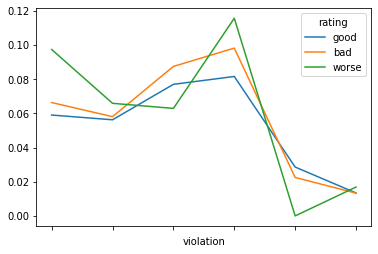

In [43]:
violation_wt_arrest_rate.plot()
plt.show()